<a href="https://colab.research.google.com/github/carlaolivei/data_visualization/blob/main/visualizacao_de_dados_covid_vacina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgo
import seaborn as sns
#import geopandas as gpd
import plotly.express as px

<h1> <h3>Sobre o Dataset</h3>

O conjunto de dados contém dados sobre o total da vacinação mundial e novas mortes por covid em 2021.

[Fonte do Dataset](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print("Upload concluído!")

Saving covid-vaccination-vs-death_ratio.csv to covid-vaccination-vs-death_ratio.csv
User uploaded file "covid-vaccination-vs-death_ratio.csv" with length 2194956 bytes
Upload concluído!


In [ ]:
df = pd.read_csv('covid-vaccination-vs-death_ratio.csv')
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40194523.0,1.116764
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40194523.0,1.170162
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40194523.0,1.185154
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40194523.0,1.192630
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40194523.0,1.193133


In [ ]:
df.shape

(24179, 10)

In [ ]:
df.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,24179.000000,2.417900e+04,2.417900e+04,2.417900e+04,24179.000000,2.417900e+04,24179.000000
mean,12089.000000,2.203965e+07,1.372980e+07,8.334646e+06,103.716035,4.911567e+07,33.481814
std,6980.020415,7.822728e+07,5.145837e+07,2.821818e+07,345.402231,1.562990e+08,26.493133
min,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,-92.000000,1.373000e+03,0.000011
25%,6044.500000,4.859780e+05,3.354615e+05,1.273365e+05,1.000000,2.951769e+06,8.676753
50%,12089.000000,2.849630e+06,1.854630e+06,9.237190e+05,9.000000,1.015616e+07,28.786167
75%,18133.500000,1.246813e+07,7.414157e+06,4.935768e+06,51.500000,3.819664e+07,56.591152
max,24178.000000,2.422908e+09,1.225000e+09,1.076308e+09,8786.000000,1.446113e+09,121.036857


<h3>Total de países do dataset</h3>

In [ ]:
df['country'].unique().shape

(200,)

<h3>Total da população</h3>

In [ ]:
#total da população
total_populacao = df['population'].unique().sum()
total_populacao

7698281931.0

<h3>Total da população vacinada completamente contra o covid em 2021</h3>

In [ ]:
#total de pessoas completamente vacinadas contra a covid
df_pessoas_vacinadas = df.groupby('country').agg({'people_fully_vaccinated':max})
sum_vac_completa = df_pessoas_vacinadas['people_fully_vaccinated'].sum()
sum_vac_completa

3235935460.0

<h3> Porcentagem das pessoas completamente vacinadas contra a covid em 2021</h3>

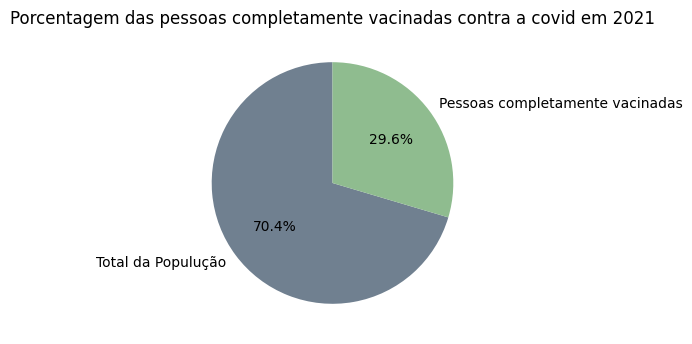

In [ ]:
plt.figure(figsize=(8, 4),dpi=100) #tamanho do gráfico)

plt.pie(
    [total_populacao,sum_vac_completa],
    autopct='%1.1f%%', #mostra em percentagem
    startangle=90,  #ângulo inicial 90°   
    colors=['slategray','darkseagreen'],
    labels=['Total da Populução','Pessoas completamente vacinadas'])
                            
plt.title('Porcentagem das pessoas completamente vacinadas contra a covid em 2021') 

plt.show()

<h3> Porcentagem das pessoas que tomaram pelo menos uma dose da vacina contra covid em 2021</h3>

In [ ]:
df_vac_uma_dose = df.groupby('country').agg({'people_vaccinated':max}).reset_index()
sum_vac_uma_dose = df_vac_uma_dose['people_vaccinated'].sum()

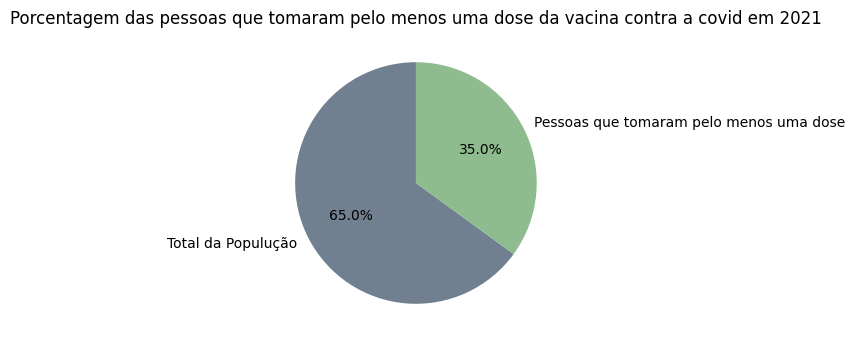

In [ ]:
plt.figure(figsize=(8, 4),dpi=100) #tamanho do gráfico)

plt.pie(
    [total_populacao,sum_vac_uma_dose],
    autopct='%1.1f%%', #mostra em percentagem
    startangle=90,  #ângulo inicial 90°   
    colors=['slategray','darkseagreen'],
    labels=['Total da Populução','Pessoas que tomaram pelo menos uma dose'])
                            
plt.title('Porcentagem das pessoas que tomaram pelo menos uma dose da vacina contra a covid em 2021') 

plt.show()

<h3> Total de pessoas vacinadas contra covid vs novas mortes em 2021</h3>

In [ ]:
data = df.groupby('date').agg('sum').reset_index()

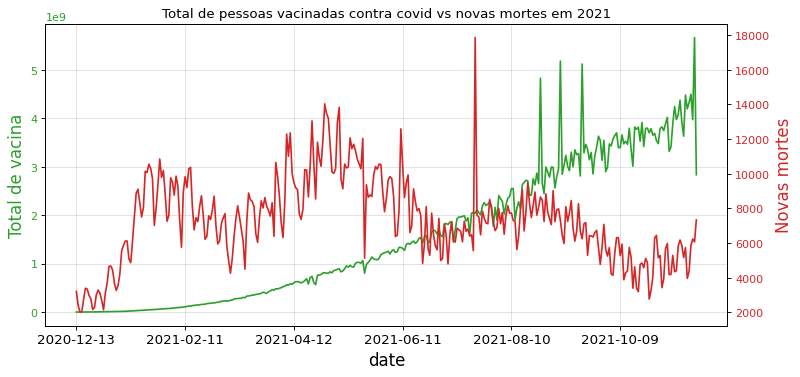

In [ ]:
x = data['date']
y1 = data['total_vaccinations']
y2 = data['New_deaths']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(11,5), dpi= 80)
ax1.plot(x,y1,color='tab:green')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#configuração da linha 1
ax1.set_xlabel('date',fontsize=15)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('Total de vacina',color='tab:green',fontsize=15)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:green')
ax1.grid(alpha=0.4)

#configuração da linha 2
ax2.set_ylabel('Novas mortes',fontsize=15,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),60))#
ax2.set_title('Total de pessoas vacinadas contra covid vs novas mortes em 2021')

plt.show()

<h3>10 Países com vacinação completa contra a covid em 2021</h3>

In [ ]:
df_paises_vac_completa = df.groupby('country').agg({'people_fully_vaccinated':max})
df_paises_vac_completa.sort_values(['people_fully_vaccinated'], ascending=False, axis=0, inplace=True)
df_paises_vac_completa_top10 = df_paises_vac_completa.head(10)

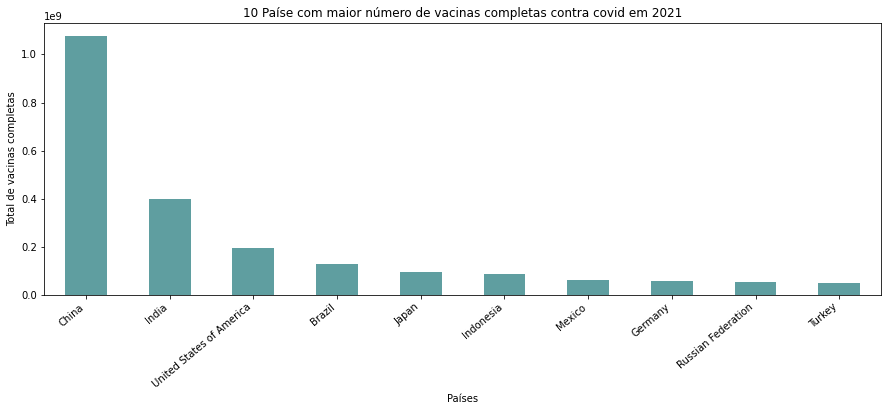

In [ ]:
ax = df_paises_vac_completa_top10['people_fully_vaccinated'].plot(kind='bar', figsize=(15, 5), color = 'cadetblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel('Países') # add to x-label to the plot
plt.ylabel('Total de vacinas completas') # add y-label to the plot
plt.title('10 Paíse com maior número de vacinas completas contra covid em 2021') # add title to the plot

plt.show()

<h3>10 Países com maior número de novas mortes por covid em 2021</h3>

In [ ]:
df_paises_mortes = df.groupby('country').sum('New_deaths')
df_paises_mortes.sort_values(['New_deaths'], ascending=False, axis=0, inplace=True)
df_paises_mortes_top10 = df_paises_mortes.head(10)


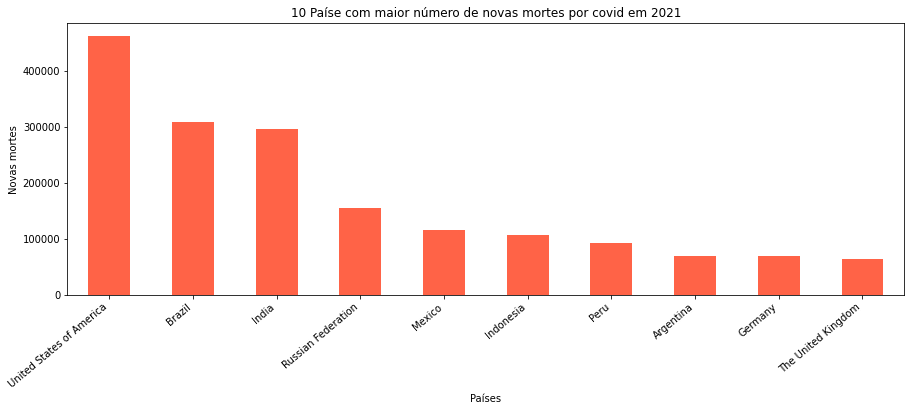

In [ ]:
ax = df_paises_mortes_top10['New_deaths'].plot(kind='bar', figsize=(15, 5), color = 'tomato')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel('Países') # add to x-label to the plot
plt.ylabel('Novas mortes') # add y-label to the plot
plt.title('10 Paíse com maior número de novas mortes por covid em 2021') # add title to the plot

plt.show()

<h1>Analisando o Brasil</h1>

In [ ]:
df_brasil = df[df['country']=='Brazil']

In [ ]:
df_brasil.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
2902,2902,Brazil,BRA,2021-02-06,3401383.0,3399421.0,1962.0,1232,214552460.0,1.584424
2903,2903,Brazil,BRA,2021-02-07,3553681.0,3534004.0,19677.0,1239,214552460.0,1.647151
2904,2904,Brazil,BRA,2021-02-08,3605538.0,3579850.0,25688.0,978,214552460.0,1.668520
2905,2905,Brazil,BRA,2021-02-09,3820207.0,3786591.0,33616.0,522,214552460.0,1.764879
2906,2906,Brazil,BRA,2021-02-10,4120332.0,4069677.0,50655.0,636,214552460.0,1.896821


In [ ]:
df_brasil.shape

(220, 10)

In [ ]:
df_brasil.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,220.000000,2.200000e+02,2.200000e+02,2.200000e+02,220.000000,220.0,220.000000
mean,3011.500000,1.050616e+08,7.087894e+07,3.576040e+07,1407.804545,214552460.0,33.035713
std,63.652704,8.834044e+07,5.538279e+07,3.565416e+07,963.811352,0.0,25.813169
min,2902.000000,3.401383e+06,3.399421e+06,1.962000e+03,61.000000,214552460.0,1.584424
25%,2956.750000,2.478540e+07,1.925436e+07,5.531037e+06,675.750000,214552460.0,8.974197
50%,3011.500000,7.852008e+07,5.485819e+07,2.366189e+07,1208.500000,214552460.0,25.568661
75%,3066.250000,1.771002e+08,1.267489e+08,5.471265e+07,2049.500000,214552460.0,59.075962
max,3121.000000,2.979605e+08,1.624368e+08,1.284820e+08,4249.000000,214552460.0,75.709591


<h3>Total da população do Brasil</h3>

In [ ]:
total_pop_brasil = df_brasil['population'].unique().sum()
total_pop_brasil

214552460.0

<h3>Total da população completamente vacinada contra o covid no Brasil em 2021</h3>

In [ ]:
df_pais_brasil = df_brasil.agg({'people_fully_vaccinated':max})
sum_vac_completa_brasil = df_pais_brasil['people_fully_vaccinated'].sum()
sum_vac_completa_brasil

128481994.0

<h3> Porcentagem das pessoas completamente vacinadas contra a covid no Brasil em 2021</h3>

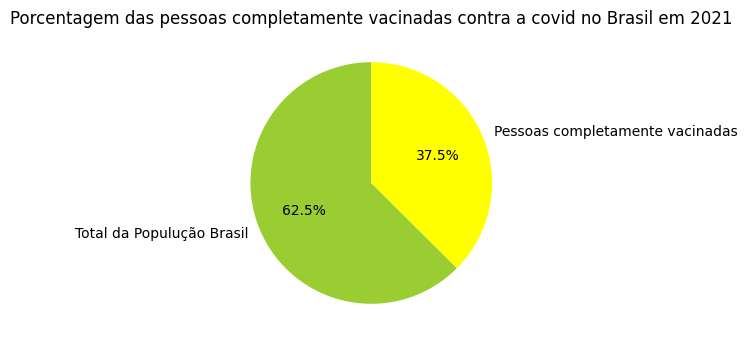

In [ ]:
plt.figure(figsize=(8, 4),dpi=100) #tamanho do gráfico)

plt.pie(
    [total_pop_brasil,sum_vac_completa_brasil],
    autopct='%1.1f%%', #mostra em percentagem
    startangle=90,  #ângulo inicial 90°   
    colors=['yellowgreen','yellow'],
    labels=['Total da Populução Brasil','Pessoas completamente vacinadas'])
                            
plt.title('Porcentagem das pessoas completamente vacinadas contra a covid no Brasil em 2021') 

plt.show()

<h3> Porcentagem das pessoas que tomaram pelo menos uma dose da vacina contra covid no Brasil em 2021</h3>

In [ ]:
df_pais_brasil_vac = df_brasil.agg({'people_vaccinated':max})
sum_vac_brasil = df_pais_brasil_vac['people_vaccinated'].sum()
sum_vac_brasil

162436791.0

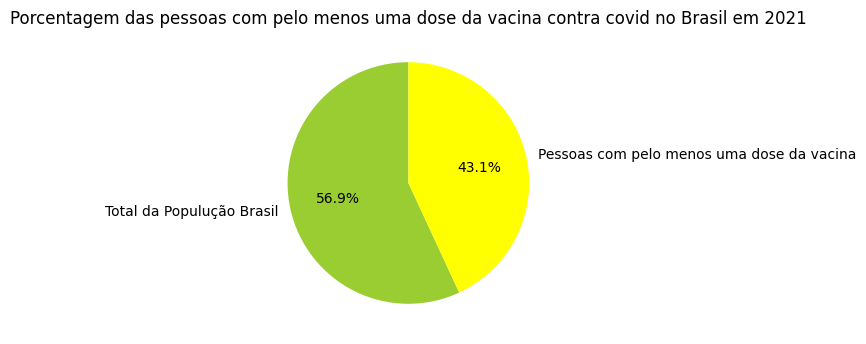

In [ ]:
plt.figure(figsize=(8, 4),dpi=100) #tamanho do gráfico)

plt.pie(
    [total_pop_brasil,sum_vac_brasil],
    autopct='%1.1f%%', #mostra em percentagem
    startangle=90,  #ângulo inicial 90°   
    colors=['yellowgreen','yellow'],
    labels=['Total da Populução Brasil','Pessoas com pelo menos uma dose da vacina'])
                            
plt.title('Porcentagem das pessoas com pelo menos uma dose da vacina contra covid no Brasil em 2021') 

plt.show()

<h3> Total de pessoas vacinadas contra covid vs novas mortes no Brasil em 2021</h3>

In [ ]:
data_brasil = df_brasil.groupby('date').agg('sum').reset_index()

Text(0.5, 1.0, 'Total de Pessoas Vacinadas vs Novas Mortes no Brasil em 2021')

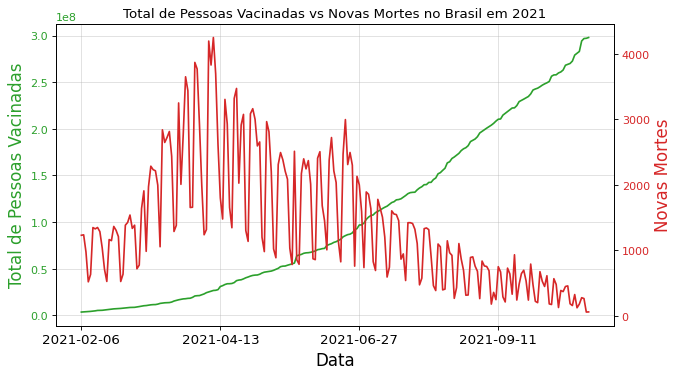

In [ ]:
#preparing data
x = data_brasil['date']
y1 = data_brasil['total_vaccinations']
y2 = data_brasil['New_deaths']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(9,5), dpi= 80)
ax1.plot(x,y1,color='tab:green')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#configuração da linha 1
ax1.set_xlabel('Data',fontsize=15)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('Total de Pessoas Vacinadas',color='tab:green',fontsize=15)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:green')
ax1.grid(alpha=0.4)

#configuração da linha 2
ax2.set_ylabel('Novas Mortes',fontsize=15,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),60))#
ax2.set_title('Total de Pessoas Vacinadas vs Novas Mortes no Brasil em 2021')